In [234]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [235]:
data = pd.read_csv ('inputs\OnlineRetail.csv' , encoding = 'latin1')
data.head (10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [236]:
data ['InvoiceDate'] = pd.to_datetime ( data['InvoiceDate'] )
data ['InvoiceYearMonth'] = data ['InvoiceDate'].map (lambda date : 100 * date.year + date.month)
data ['Revenue'] = data ['UnitPrice'] * data ['Quantity']

    InvoiceYearMonth      Revenue
0             201012   748957.020
1             201101   560000.260
2             201102   498062.650
3             201103   683267.080
4             201104   493207.121
5             201105   723333.510
6             201106   691123.120
7             201107   681300.111
8             201108   682680.510
9             201109  1019687.622
10            201110  1070704.670
11            201111  1461756.250
12            201112   433668.010


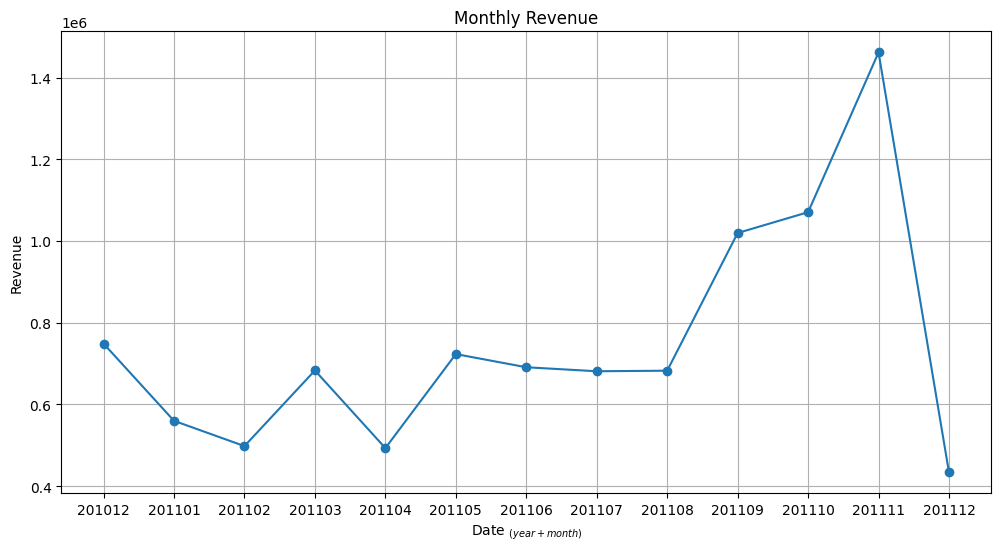

In [237]:
revenue = data.groupby (['InvoiceYearMonth'])['Revenue'].sum().reset_index()
print (revenue)

plt.figure (figsize = (12 , 6))
plt.plot ( revenue['InvoiceYearMonth'].to_numpy (dtype = str) 
         , revenue['Revenue'].to_numpy () 
         , marker = 'o')
plt.title ('Monthly Revenue')
plt.xlabel ('Date $_{(year+month)}$')
plt.ylabel ('Revenue')
plt.grid ()
plt.show ()

    InvoiceYearMonth      Revenue  MonthlyGrowth
0             201012   748957.020            NaN
1             201101   560000.260      -0.252293
2             201102   498062.650      -0.110603
3             201103   683267.080       0.371850
4             201104   493207.121      -0.278163
5             201105   723333.510       0.466592
6             201106   691123.120      -0.044530
7             201107   681300.111      -0.014213
8             201108   682680.510       0.002026
9             201109  1019687.622       0.493653
10            201110  1070704.670       0.050032
11            201111  1461756.250       0.365228
12            201112   433668.010      -0.703324


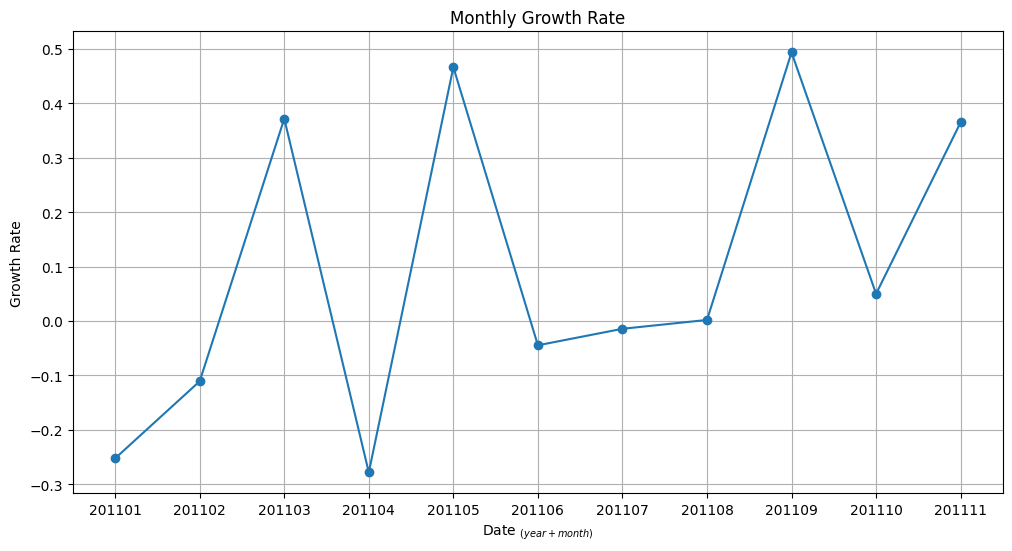

In [238]:
revenue ['MonthlyGrowth'] = revenue ['Revenue'].pct_change ()
print (revenue)

plt.figure (figsize = (12 , 6))
plt.plot ( revenue.query('InvoiceYearMonth < 201112')['InvoiceYearMonth'].to_numpy (dtype = str) 
         , revenue.query('InvoiceYearMonth < 201112')['MonthlyGrowth'].to_numpy () 
         , marker = 'o')
plt.title ('Monthly Growth Rate')
plt.xlabel ('Date $_{(year+month)}$')
plt.ylabel ('Growth Rate')
plt.grid ()
plt.show ()

    InvoiceYearMonth  CustomerID
0             201012         871
1             201101         684
2             201102         714
3             201103         923
4             201104         817
5             201105         985
6             201106         943
7             201107         899
8             201108         867
9             201109        1177
10            201110        1285
11            201111        1548
12            201112         617


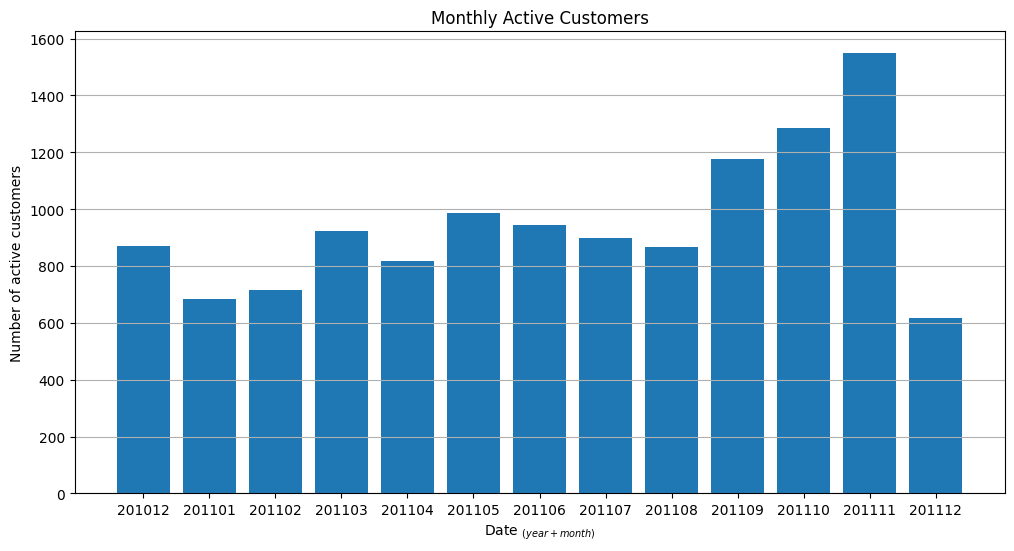

In [239]:
uk = data.query ('Country == "United Kingdom"').reset_index(drop = True)
monthly_active = uk.groupby ('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
print(monthly_active)

plt.figure (figsize = (12 , 6))
plt.bar ( monthly_active['InvoiceYearMonth'].to_numpy (dtype = str) 
         , monthly_active['CustomerID'].to_numpy ())
plt.title ('Monthly Active Customers')
plt.xlabel ('Date $_{(year+month)}$')
plt.ylabel ('Number of active customers')
plt.grid (axis = 'y')
plt.show ()

    InvoiceYearMonth  Quantity
0             201012    298101
1             201101    237381
2             201102    225641
3             201103    279843
4             201104    257666
5             201105    306452
6             201106    258522
7             201107    324129
8             201108    319804
9             201109    458490
10            201110    455612
11            201111    642281
12            201112    199907


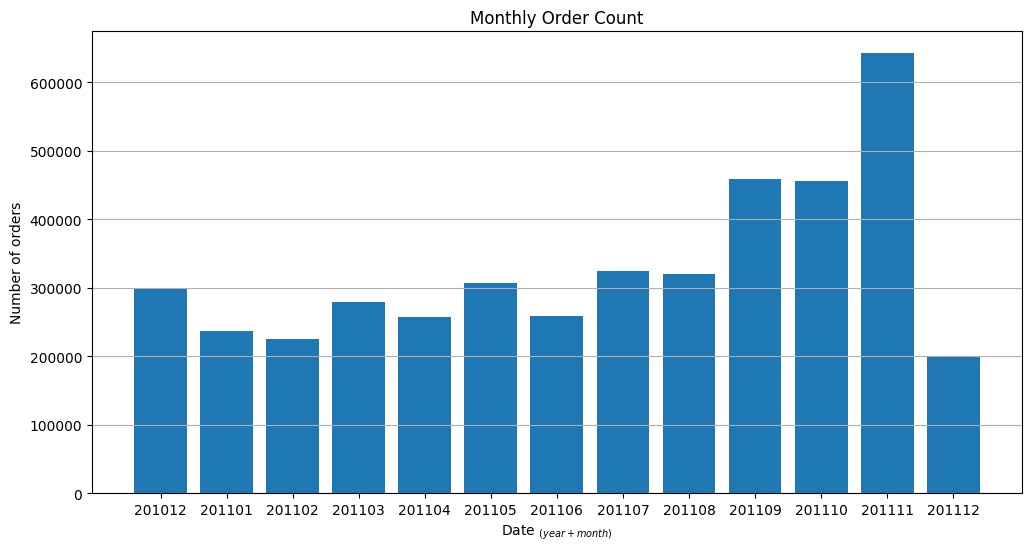

In [240]:
monthly_sales = uk.groupby ('InvoiceYearMonth')['Quantity'].sum().reset_index()
print (monthly_sales)

plt.figure (figsize = (12 , 6))
plt.bar ( monthly_sales['InvoiceYearMonth'].to_numpy (dtype = str) 
         , monthly_sales['Quantity'].to_numpy ())
plt.title ('Monthly Order Count')
plt.xlabel ('Date $_{(year+month)}$')
plt.ylabel ('Number of orders')
plt.grid (axis = 'y')
plt.show ()


    InvoiceYearMonth    Revenue
0             201012  16.865860
1             201101  13.614680
2             201102  16.093027
3             201103  16.716166
4             201104  15.773380
5             201105  17.713823
6             201106  16.714748
7             201107  15.723497
8             201108  17.315899
9             201109  18.931723
10            201110  16.093582
11            201111  16.312383
12            201112  16.247406


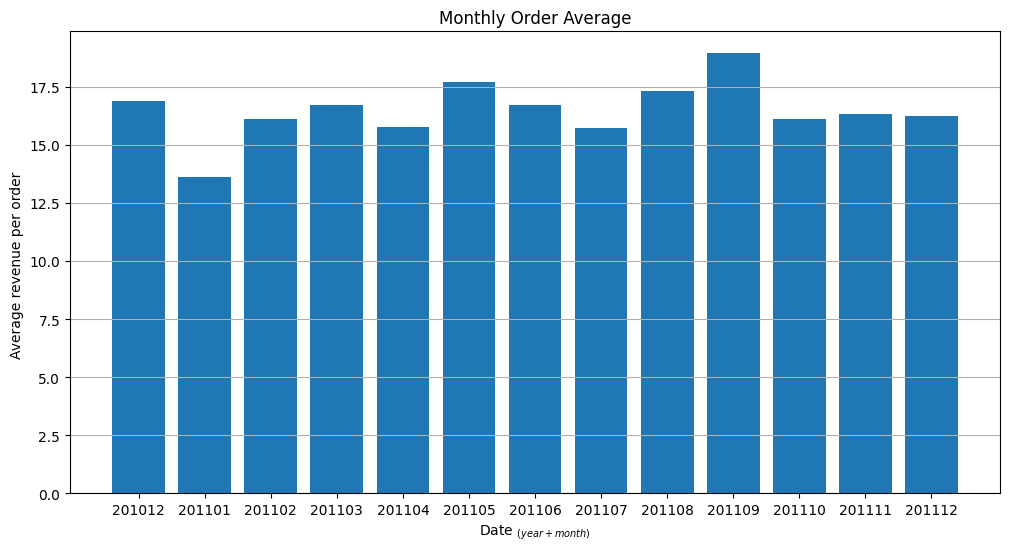

In [241]:
monthly_order_average = uk.groupby ('InvoiceYearMonth')['Revenue'].mean().reset_index()
print (monthly_order_average)

plt.figure (figsize = (12 , 6))
plt.bar ( monthly_order_average['InvoiceYearMonth'].to_numpy (dtype = str) 
         , monthly_order_average['Revenue'].to_numpy ())
plt.title ('Monthly Order Average')
plt.xlabel ('Date $_{(year+month)}$')
plt.ylabel ('Average revenue per order ')
plt.grid (axis = 'y')
plt.show ()

    InvoiceYearMonth  UserType     Revenue
1             201101  Existing  195275.510
2             201101       New  156705.770
3             201102  Existing  220994.630
4             201102       New  127859.000
5             201103  Existing  296350.030
6             201103       New  160567.840
7             201104  Existing  268226.660
8             201104       New  108517.751
9             201105  Existing  434725.860
10            201105       New   90847.490
11            201106  Existing  408030.060
12            201106       New   64479.190
13            201107  Existing  407693.610
14            201107       New   53453.991
15            201108  Existing  421388.930
16            201108       New   55619.480
17            201109  Existing  640861.901
18            201109       New  135667.941
19            201110  Existing  648837.600
20            201110       New  133940.280
21            201111  Existing  838955.910
22            201111       New  117153.750


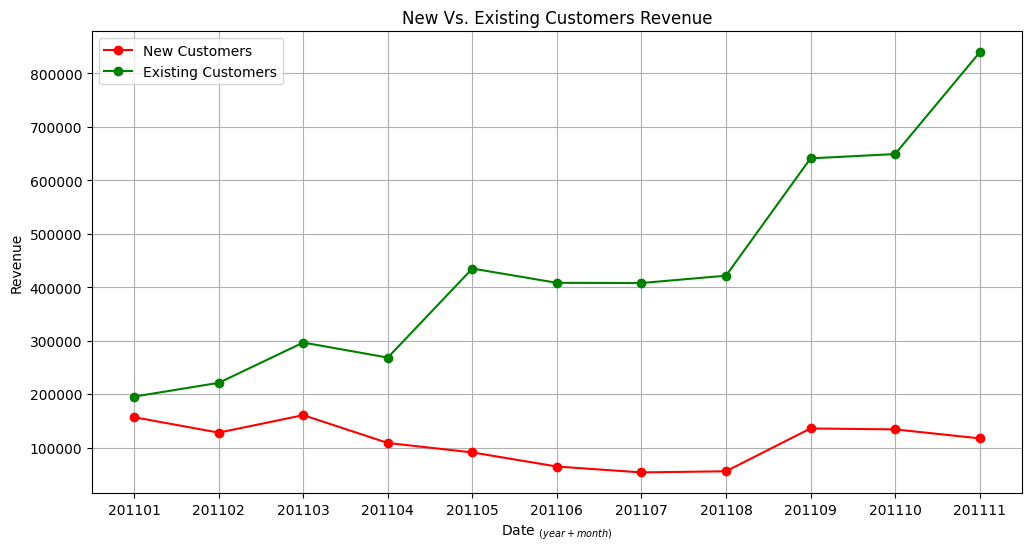

In [242]:
min_purchase = uk.groupby ('CustomerID')['InvoiceYearMonth'].min().reset_index()
min_purchase.columns = ['CustomerID' , 'MinPurchaseDate']

uk = pd.merge (uk , min_purchase , on = 'CustomerID')

uk['UserType'] = 'New'
uk.loc [uk['InvoiceYearMonth'] > uk['MinPurchaseDate'] , 'UserType'] = 'Existing'

user_type_revenue = uk.groupby(['InvoiceYearMonth' , 'UserType'])['Revenue'].sum().reset_index()
user_type_revenue = user_type_revenue.query ('InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112')
print(user_type_revenue)

plt.figure (figsize = (12 , 6))
plt.plot ( user_type_revenue.query ('UserType == "New"')['InvoiceYearMonth'].to_numpy (dtype = str)
         , user_type_revenue.query ('UserType == "New"')['Revenue'].to_numpy ()
         , marker = 'o'
         , color = 'red'
         , label = 'New Customers') 

plt.plot ( user_type_revenue.query ("UserType == 'Existing'")['InvoiceYearMonth'].to_numpy (dtype = str)
         , user_type_revenue.query ("UserType == 'Existing'")['Revenue'].to_numpy ()
         , marker = 'o'
         , color = 'green'
         , label = 'Existing Customers') 

plt.title ('New Vs. Existing Customers Revenue')
plt.xlabel ('Date $_{(year+month)}$')
plt.ylabel ('Revenue')
plt.grid ()
plt.legend ()
plt.show ()


    InvoiceYearMonth  CustomerID
1             201101    1.124224
2             201102    0.904000
3             201103    0.792233
4             201104    0.510166
5             201105    0.343793
6             201106    0.281250
7             201107    0.236589
8             201108    0.192572
9             201109    0.304878
10            201110    0.328852
11            201111    0.236422
12            201112    0.058319


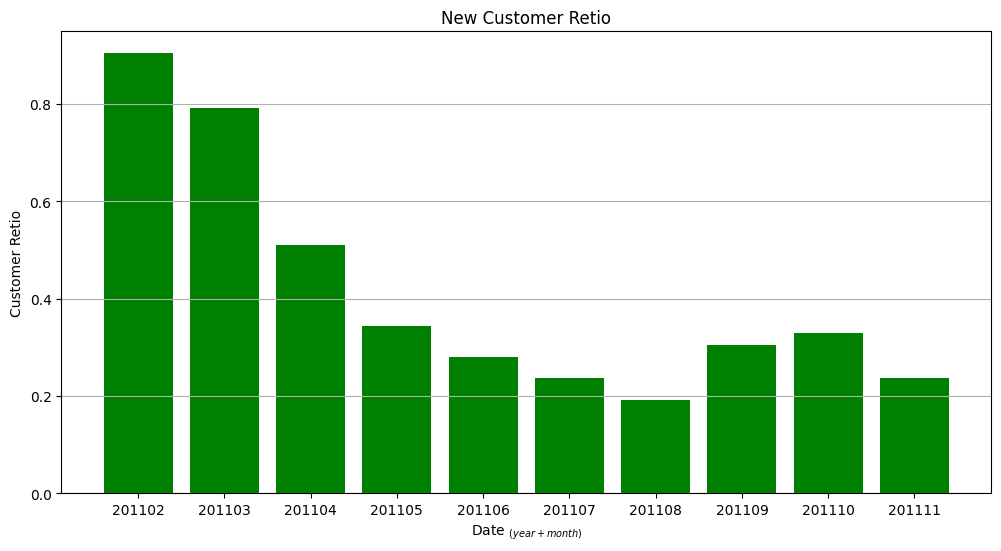

In [244]:
user_ratio = uk.query('UserType == "New"').groupby(['InvoiceYearMonth'])['CustomerID'].nunique() / uk.query('UserType == "Existing"').groupby(['InvoiceYearMonth'])['CustomerID'].nunique()
user_ratio = user_ratio.reset_index()
user_ratio = user_ratio.dropna ()
print (user_ratio)

plt.figure (figsize = (12 , 6))
plt.bar ( user_ratio.query ('InvoiceYearMonth > 201101 and InvoiceYearMonth < 201112')['InvoiceYearMonth'].to_numpy (dtype = str)
        , user_ratio.query ('InvoiceYearMonth > 201101 and InvoiceYearMonth < 201112')['CustomerID'].to_numpy() 
        , color = 'green' )

plt.title ('New Customer Retio')
plt.xlabel ('Date $_{(year+month)}$')
plt.ylabel ('Customer Retio')
plt.grid (axis = 'y')
plt.show ()
